# Test of xarray use, following the User Guide

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

## Create a DataArray

In [2]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[-0.88610415, -0.34012437, -0.16687999],
       [-2.02445235,  0.11913645,  0.40094563]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [6]:
data.values

array([[-0.88610415, -0.34012437, -0.16687999],
       [-2.02445235,  0.11913645,  0.40094563]])

In [7]:
data.dims

('x', 'y')

In [8]:
data.coords

Coordinates:
  * x        (x) int64 16B 10 20

In [9]:
data.attrs

{}

## Indexing

In [14]:
# positional and by integer label, like numpy
data[0, :]

<xarray.DataArray (y: 3)> Size: 24B
array([-0.88610415, -0.34012437, -0.16687999])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [15]:
# loc or "location": positional and coordinate label, like pandas
data.loc[10]

<xarray.DataArray (y: 3)> Size: 24B
array([-0.88610415, -0.34012437, -0.16687999])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [16]:
# isel or "integer select":  by dimension name and integer label
data.isel(x=0)

<xarray.DataArray (y: 3)> Size: 24B
array([-0.88610415, -0.34012437, -0.16687999])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [17]:
# sel or "select": by dimension name and coordinate label
data.sel(x=10)

<xarray.DataArray (y: 3)> Size: 24B
array([-0.88610415, -0.34012437, -0.16687999])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

## Attributes

While you’re setting up your DataArray, it’s often a good idea to set metadata attributes. A useful choice is to set data.attrs['long_name'] and data.attrs['units'] since xarray will use these, if present, to automatically label your plots. These special names were chosen following the NetCDF Climate and Forecast (CF) Metadata Conventions. attrs is just a Python dictionary, so you can assign anything you wish.

In [19]:
data.attrs["long_name"] = "random velocity"
data.attrs["units"] = "metres/sec"
data.attrs["description"] = "A random variable created as an example."
data.attrs["random_attribute"] = 123
data.attrs

{'long_name': 'random velocity',
 'units': 'metres/sec',
 'description': 'A random variable created as an example.',
 'random_attribute': 123}

In [21]:
# you can add metadata to coordinates too
data.x.attrs["units"] = "x units"

In [22]:
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[-0.88610415, -0.34012437, -0.16687999],
       [-2.02445235,  0.11913645,  0.40094563]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

## Computation

In [26]:
data + 10

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[ 9.11389585,  9.65987563,  9.83312001],
       [ 7.97554765, 10.11913645, 10.40094563]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [28]:
np.sin(data + 2*np.pi)

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[-0.77461376, -0.33360434, -0.16610649],
       [-0.89885084,  0.11885482,  0.39028915]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [29]:
data.T

<xarray.DataArray (y: 3, x: 2)> Size: 48B
array([[-0.88610415, -2.02445235],
       [-0.34012437,  0.11913645],
       [-0.16687999,  0.40094563]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [30]:
data.sum()

<xarray.DataArray ()> Size: 8B
array(-2.89747877)

In [32]:
data.mean(dim='y')

<xarray.DataArray (x: 2)> Size: 16B
array([-0.4643695 , -0.50145676])
Coordinates:
  * x        (x) int64 16B 10 20

In [34]:
a = xr.DataArray(np.random.randn(3), [data.coords["y"]])
b = xr.DataArray(np.random.randn(4), dims="z")

In [35]:
a

<xarray.DataArray (y: 3)> Size: 24B
array([-0.37584371,  1.35385746,  1.36760087])
Coordinates:
  * y        (y) int64 24B 0 1 2

In [36]:
b

<xarray.DataArray (z: 4)> Size: 32B
array([-1.15311961, -0.29528084,  1.09640071, -0.60507178])
Dimensions without coordinates: z

Arithmetic operations broadcast based on dimension name. This means you don’t need to insert dummy dimensions for alignment:

In [37]:
a+b

<xarray.DataArray (y: 3, z: 4)> Size: 96B
array([[-1.52896332, -0.67112456,  0.72055699, -0.98091549],
       [ 0.20073786,  1.05857662,  2.45025817,  0.74878569],
       [ 0.21448127,  1.07232003,  2.46400158,  0.76252909]])
Coordinates:
  * y        (y) int64 24B 0 1 2
Dimensions without coordinates: z

It also means that in most cases you do not need to worry about the order of dimensions:

In [38]:
data - data.T

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

Operations also align based on index labels:

In [39]:
data[:-1] - data[:1]

<xarray.DataArray (x: 1, y: 3)> Size: 24B
array([[0., 0., 0.]])
Coordinates:
  * x        (x) int64 8B 10
Dimensions without coordinates: y

## Groupby

In [45]:
labels = xr.DataArray(["E", "F", "E"], [data.coords["y"]], name="labels")

In [46]:
labels

<xarray.DataArray 'labels' (y: 3)> Size: 12B
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 24B 0 1 2

This, e.g., gives us additional ability to "label" (which is the additional groupby dimension) along the original "y" axis

In [47]:
data.groupby(labels).mean("y")

<xarray.DataArray (x: 2, labels: 2)> Size: 32B
array([[-0.52649207, -0.34012437],
       [-0.81175336,  0.11913645]])
Coordinates:
  * x        (x) int64 16B 10 20
  * labels   (labels) object 16B 'E' 'F'
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

## Plotting

In [55]:
data.x.attrs["long name"] = "Position"

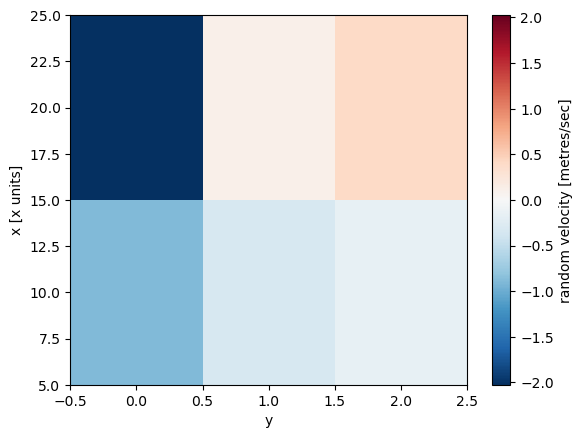

In [56]:
data.plot()

## Datasets

In [57]:
ds = xr.Dataset(dict(foo=data, bar=("x", [1, 2]), baz=np.pi))

In [58]:
ds

<xarray.Dataset> Size: 88B
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 48B -0.8861 -0.3401 -0.1669 -2.024 0.1191 0.4009
    bar      (x) int64 16B 1 2
    baz      float64 8B 3.142

## Read & Write netCDF files

In [59]:
ds.to_netcdf("example.nc")
reopened = xr.open_dataset("example.nc")

In [60]:
reopened

<xarray.Dataset> Size: 88B
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 48B ...
    bar      (x) int64 16B ...
    baz      float64 8B ...

In [61]:
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[-0.88610415, -0.34012437, -0.16687999],
       [-2.02445235,  0.11913645,  0.40094563]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [63]:
ds.variables

Frozen({'x': <xarray.IndexVariable 'x' (x: 2)> Size: 16B
array([10, 20])
Attributes:
    units:      x units
    long name:  Position, 'foo': <xarray.Variable (x: 2, y: 3)> Size: 48B
array([[-0.88610415, -0.34012437, -0.16687999],
       [-2.02445235,  0.11913645,  0.40094563]])
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123, 'bar': <xarray.Variable (x: 2)> Size: 16B
array([1, 2]), 'baz': <xarray.Variable ()> Size: 8B
array(3.14159265)})

In [64]:
data.dims

('x', 'y')